In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [226]:
df=pd.read_csv('/Users/chiranthdg/Downloads/archive-4/googleplaystoredata.csv')

In [227]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [229]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [230]:
df = df.rename(columns=str.lower)

In [231]:
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content rating', 'genres', 'last updated', 'current ver',
       'android ver'],
      dtype='object')

In [232]:
df[df.duplicated(subset='app')]

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [233]:
df.drop_duplicates(subset='app', inplace=True, ignore_index=True)

In [234]:
df1= df.copy()

In [235]:
df1

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9657,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [236]:
print('Number of non numeric reviews :', len(df1) - df1.reviews.str.isnumeric().sum())

Number of non numeric reviews : 1


In [237]:
df[pd.to_numeric(df1.reviews, errors='coerce').isna()]

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [238]:
df.at[9300,'category'] = np.nan
df.at[9300,'rating'] = 1.9
df.at[9300,'reviews'] = 19.0
df.at[9300,'size'] = '3.0M'
df.at[9300,'installs'] = '1,000+'
df.at[9300,'type'] = 'Free'
df.at[9300,'price'] = 0
df.at[9300,'content rating'] = 'Everyone'
df.at[9300,'genres'] = np.nan
df.at[9300,'last updated'] = 'February 11, 2018'
df.at[9300,'current ver'] = '1.0.19'
df.at[9300,'android ver'] = '4.0 and up'

In [239]:
print('Number of non numeric reviews :', len(df1) - df1.reviews.str.isnumeric().sum())

Number of non numeric reviews : 1


In [240]:
df1 = df1.drop(9300)
df1= df1.reset_index(drop=True)

In [241]:
print('Number of non numeric reviews :', len(df1) - df1.reviews.str.isnumeric().sum())

Number of non numeric reviews : 0


In [242]:
df1['reviews'] = df1['reviews'].astype('int64')

In [243]:
df1['size']

0                      19M
1                      14M
2                     8.7M
3                      25M
4                     2.8M
               ...        
9654                   53M
9655                  3.6M
9656                  9.5M
9657    Varies with device
9658                   19M
Name: size, Length: 9659, dtype: object

In [244]:
df1['size'] = df1['size'].replace('Varies with device', 'NaN', regex=True)

In [245]:
sval =[]

for i in df1['size']:
    if i == 'NaN':
        sval.append('NaN')
    elif i[-1] == 'k':
        sval.append(float(i[:-1])/1000)
    else:
        sval.append(float(i[:-1]))

In [246]:
sval

[19.0,
 14.0,
 8.7,
 25.0,
 2.8,
 5.6,
 19.0,
 29.0,
 33.0,
 3.1,
 28.0,
 12.0,
 20.0,
 21.0,
 37.0,
 2.7,
 5.5,
 17.0,
 39.0,
 31.0,
 14.0,
 12.0,
 4.2,
 7.0,
 23.0,
 6.0,
 25.0,
 6.1,
 4.6,
 4.2,
 9.2,
 5.2,
 11.0,
 11.0,
 4.2,
 9.2,
 24.0,
 'NaN',
 11.0,
 9.4,
 15.0,
 10.0,
 'NaN',
 1.2,
 12.0,
 24.0,
 26.0,
 8.0,
 7.9,
 25.0,
 56.0,
 57.0,
 'NaN',
 35.0,
 33.0,
 33.0,
 5.6,
 54.0,
 0.201,
 3.6,
 5.7,
 17.0,
 8.6,
 2.4,
 27.0,
 2.7,
 2.5,
 'NaN',
 'NaN',
 7.0,
 35.0,
 16.0,
 16.0,
 'NaN',
 17.0,
 3.4,
 8.9,
 3.9,
 2.9,
 38.0,
 32.0,
 37.0,
 15.0,
 5.4,
 18.0,
 'NaN',
 38.0,
 1.1,
 'NaN',
 'NaN',
 7.9,
 35.0,
 'NaN',
 17.0,
 19.0,
 14.0,
 2.2,
 4.5,
 17.0,
 14.0,
 9.8,
 21.0,
 'NaN',
 52.0,
 14.0,
 25.0,
 9.0,
 'NaN',
 12.0,
 'NaN',
 35.0,
 6.7,
 30.0,
 5.7,
 2.9,
 17.0,
 2.9,
 'NaN',
 'NaN',
 2.6,
 4.2,
 7.1,
 57.0,
 3.7,
 22.0,
 24.0,
 7.4,
 21.0,
 3.4,
 2.9,
 3.1,
 6.4,
 3.2,
 8.2,
 9.9,
 2.9,
 23.0,
 4.6,
 3.1,
 'NaN',
 4.9,
 9.5,
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 4.2,
 5.

In [247]:
df1['size']=sval

In [248]:
df1

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [249]:
df1['size'] = df1['size'].astype(float)

In [250]:
df1.rename(columns={df1.columns[4]:'size(MB)'}, inplace=True)

<AxesSubplot:xlabel='size(MB)'>

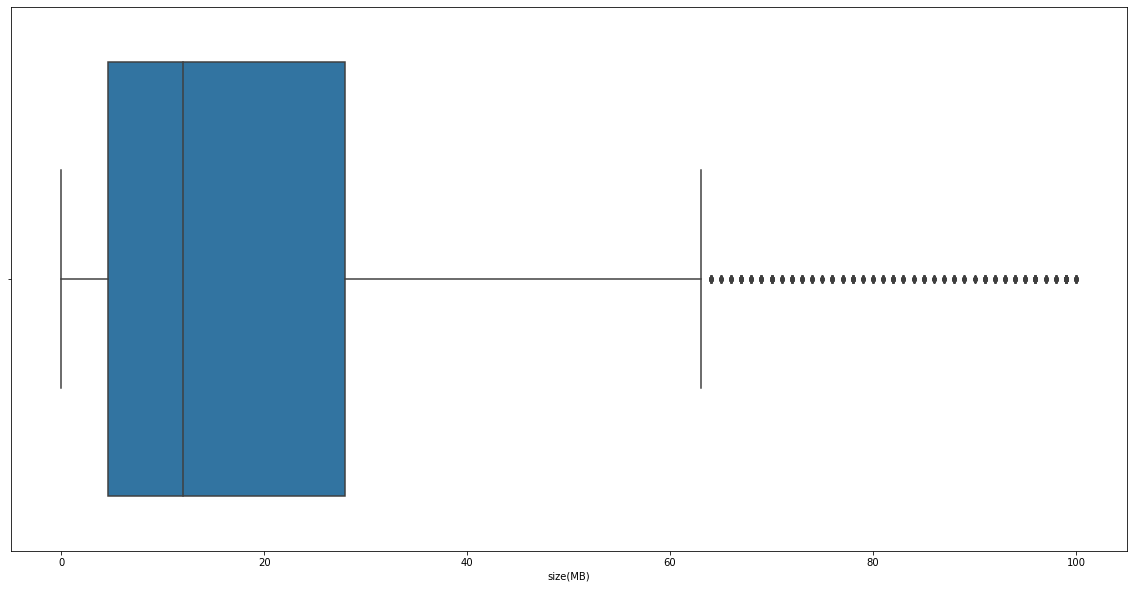

In [251]:
sns.boxplot(x='size(MB)', data=df1)

<AxesSubplot:xlabel='size(MB)', ylabel='Count'>

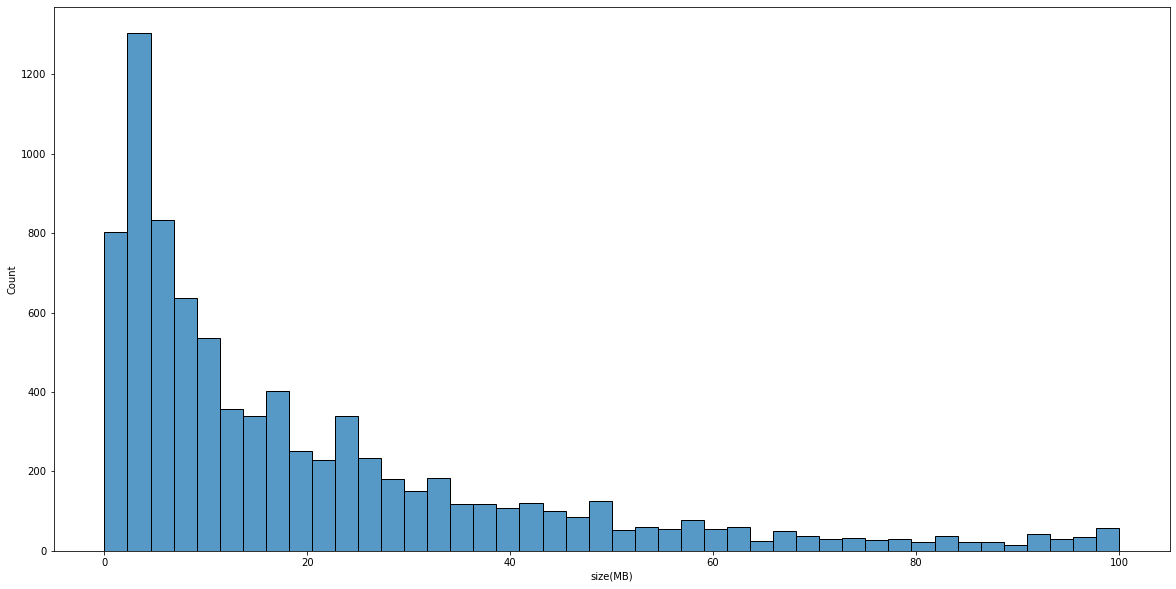

In [252]:
sns.histplot(x='size(MB)', data=df1)

In [253]:
print('Average app size is: ', df1['size(MB)'].mean())
print('Median app size is: ', df1['size(MB)'].median())
print('Mode app size is: ', df1['size(MB)'].mode()[0])

Average app size is:  20.39528931451608
Median app size is:  12.0
Mode app size is:  11.0


<AxesSubplot:xlabel='rating'>

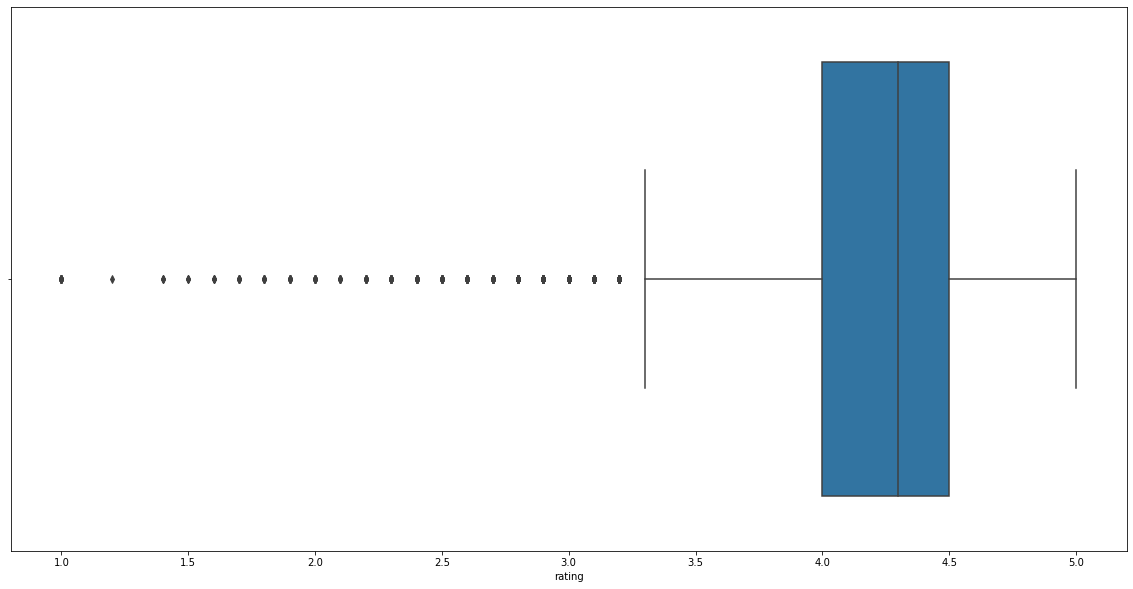

In [254]:
sns.boxplot(x='rating', data=df1)

<AxesSubplot:xlabel='rating', ylabel='Count'>

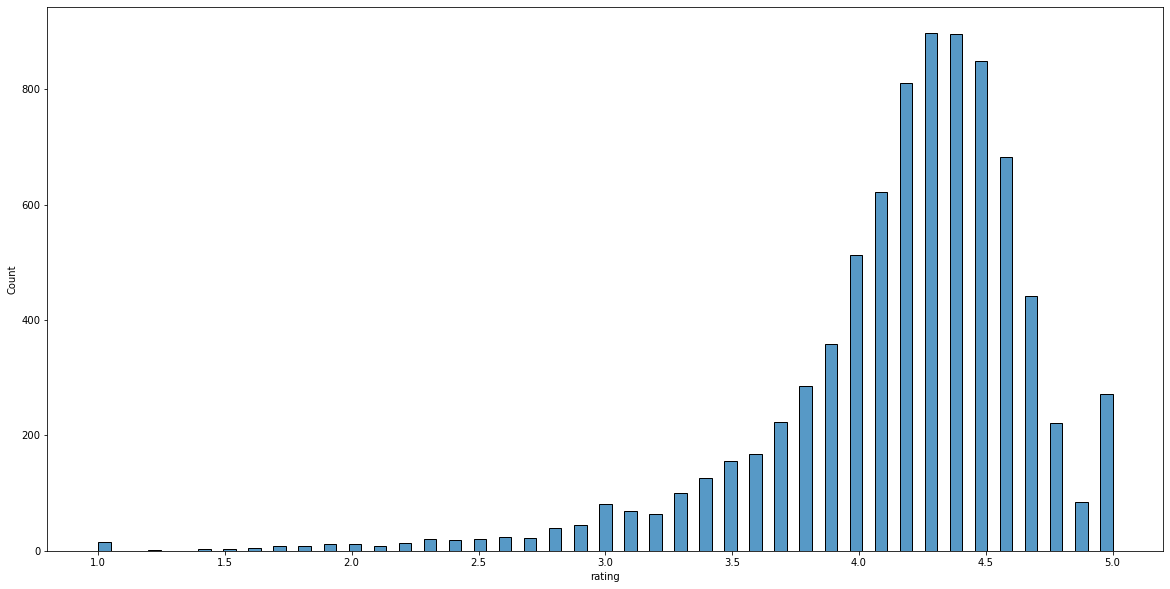

In [255]:
sns.histplot(x='rating', data=df1)

In [256]:
print('Average app rating is: ', df1['rating'].mean())
print('Median app rating is: ', df1['rating'].median())
print('Mode app rating is: ', df1['rating'].mode()[0])

Average app rating is:  4.173243045387998
Median app rating is:  4.3
Mode app rating is:  4.3


In [257]:
df1[df1['rating'] <= 1.0]

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver
524,House party - live chat,DATING,1.0,1,9.2,10+,Free,0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up
3268,Speech Therapy: F,FAMILY,1.0,1,16.0,10+,Paid,$2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up
4199,Clarksburg AH,MEDICAL,1.0,1,28.0,50+,Free,0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up
4986,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0,50+,Paid,$1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up
5311,BJ Bridge Standard American 2018,GAME,1.0,1,4.9,"1,000+",Free,0,Everyone,Card,"May 21, 2018",6.2-sayc,4.0 and up
5479,MbH BM,MEDICAL,1.0,1,2.3,100+,Free,0,Everyone,Medical,"December 14, 2016",1.1.3,4.3 and up
6100,CB Mobile Biz,FINANCE,1.0,3,8.4,500+,Free,0,Everyone,Finance,"February 22, 2016",4.4.1255,4.0 and up
6336,Thistletown CI,PRODUCTIVITY,1.0,1,6.6,100+,Free,0,Everyone,Productivity,"March 15, 2018",41.9,4.1 and up
6380,CJ DVD Rentals,COMMUNICATION,1.0,5,13.0,100+,Free,0,Everyone,Communication,"October 6, 2017",1.0,4.1 and up
6747,CR Magazine,BUSINESS,1.0,1,7.8,100+,Free,0,Everyone,Business,"July 23, 2014",2.4.2,2.3.3 and up


In [258]:
df1['price'] = df1['price'].str.replace('$','').astype(float)
df1

/var/folders/rw/l5vlj5_523xdwfb7kqxnvdrr0000gn/T/ipykernel_72156/1627895812.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['price'] = df1['price'].str.replace('$','').astype(float)


,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [259]:
df1['price'].value_counts()

0.00      8903
0.99       145
2.99       124
1.99        73
4.99        70
          ... 
18.99        1
389.99       1
19.90        1
1.75         1
1.04         1
Name: price, Length: 92, dtype: int64

In [260]:
print('Free apps are {}% of the total apps in the dataset'.format(np.round(len(df1[df1['price']==0])*100/len(df1)),2))

Free apps are 92.0% of the total apps in the dataset


<AxesSubplot:xlabel='price', ylabel='Count'>

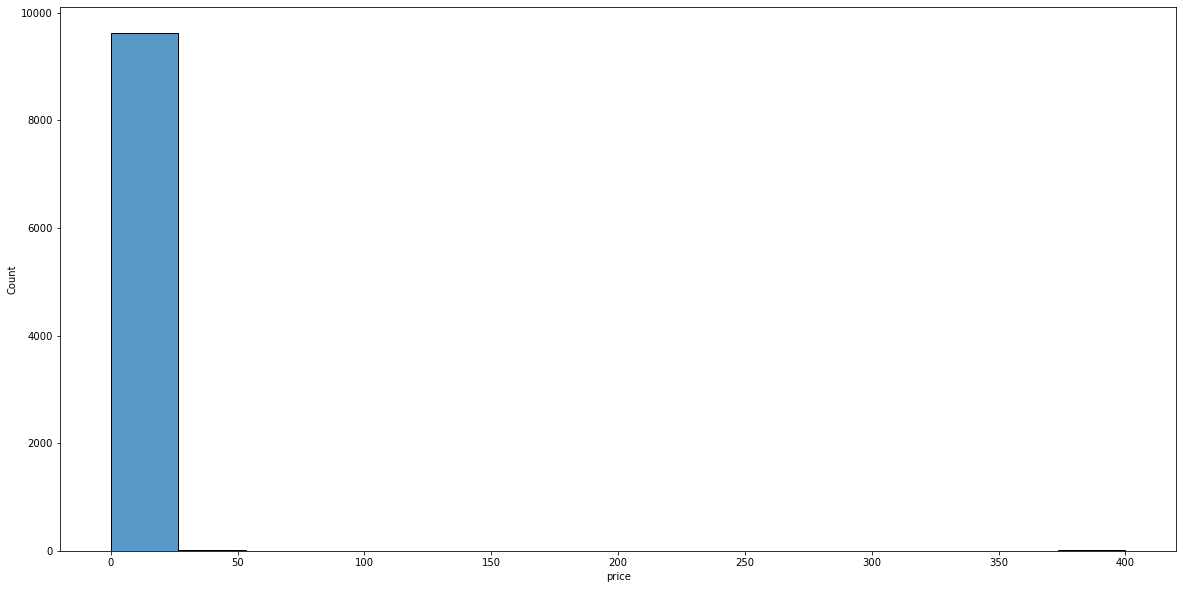

In [261]:
sns.histplot(x='price', data=df1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

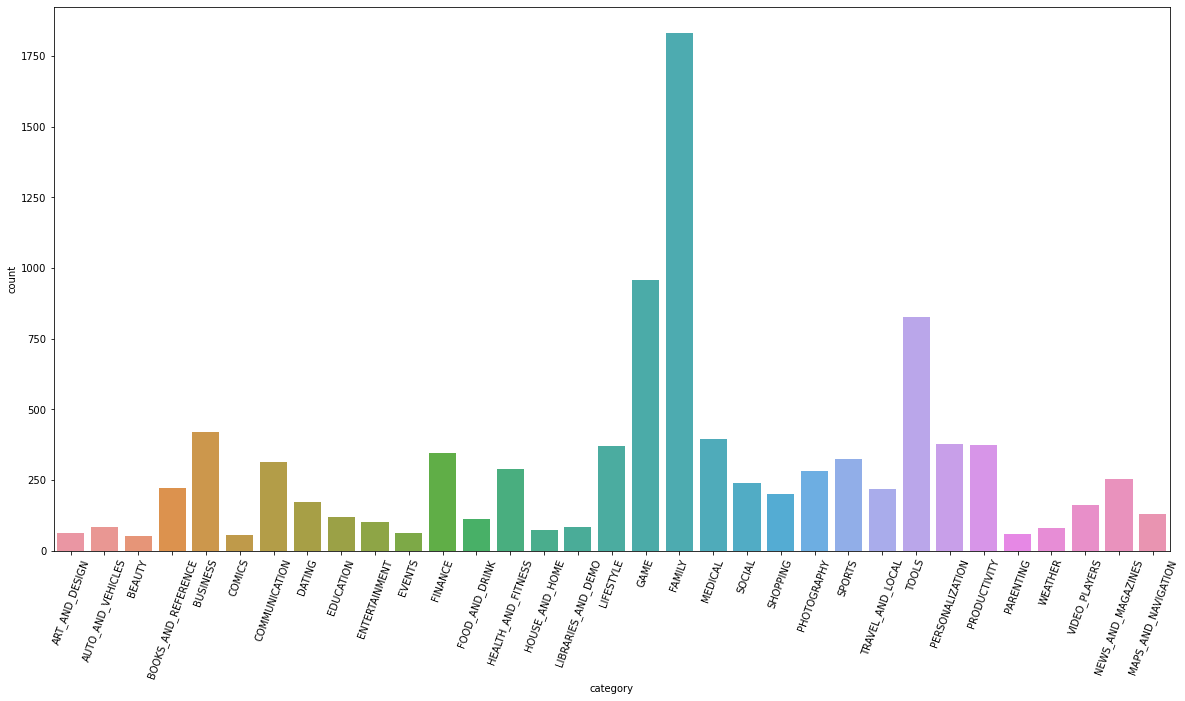

In [262]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='category',data=df1)
plt.xticks(rotation=70)

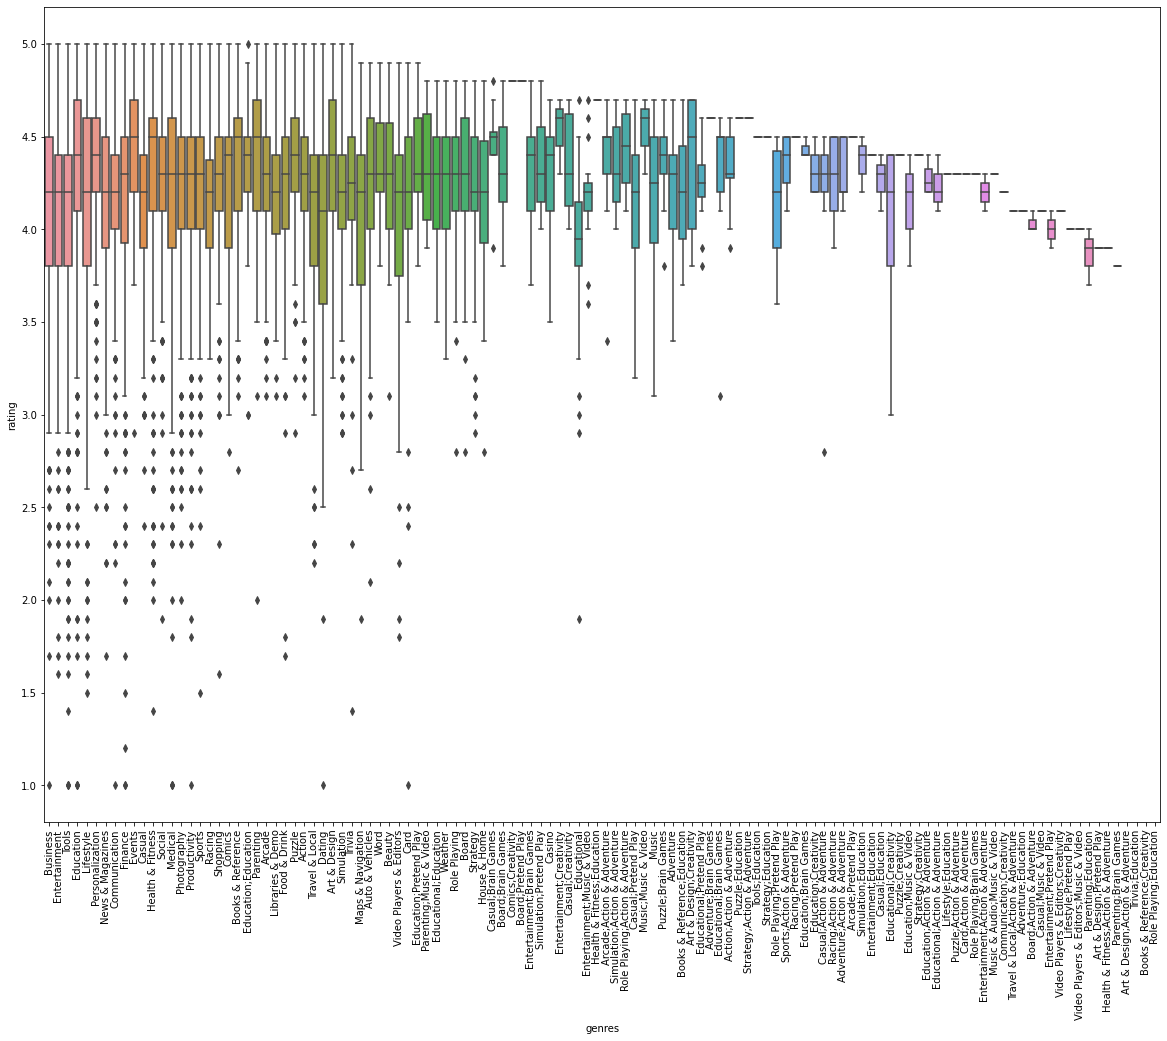

In [263]:
plt.figure(figsize=(20,15))
sns.boxplot(y='rating',x='genres',data = df1.sort_values('rating',ascending=False))
plt.xticks(rotation=90)
plt.show()

In [264]:
df1['installs'] = df1['installs'].str.replace('+','').str.replace(',','').astype(float)

/var/folders/rw/l5vlj5_523xdwfb7kqxnvdrr0000gn/T/ipykernel_72156/2213350362.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['installs'] = df1['installs'].str.replace('+','').str.replace(',','').astype(float)


<AxesSubplot:xlabel='installs', ylabel='Density'>

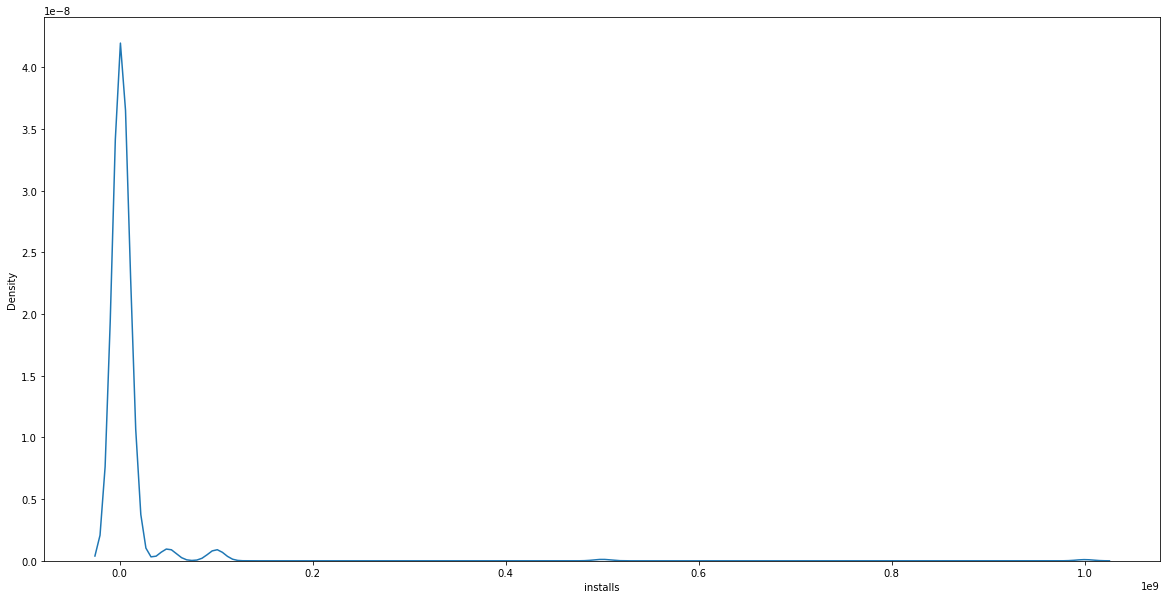

In [265]:
sns.kdeplot(x='installs', data=df1)

In [266]:
df1[df1['installs']> 0.8e9 ]

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
299,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
300,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
302,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
304,Gmail,COMMUNICATION,4.3,4604324,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
305,Hangouts,COMMUNICATION,4.0,3419249,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
349,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
701,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1.000000e+09,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
1356,Subway Surfers,GAME,4.5,27722264,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2002,Facebook,SOCIAL,4.1,78158306,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


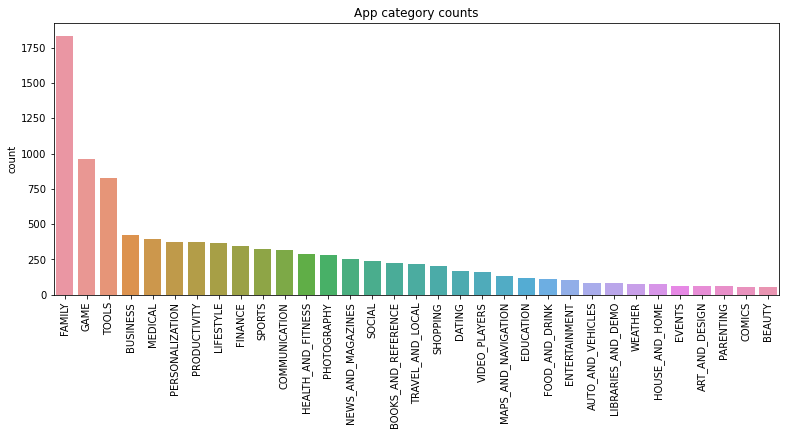

In [267]:
plt.subplots(figsize=(13,5))
sns.countplot(x='category', data=df1, order = df1['category'].value_counts().index)
plt.xticks(rotation=90);
plt.xlabel('')
plt.title('App category counts');

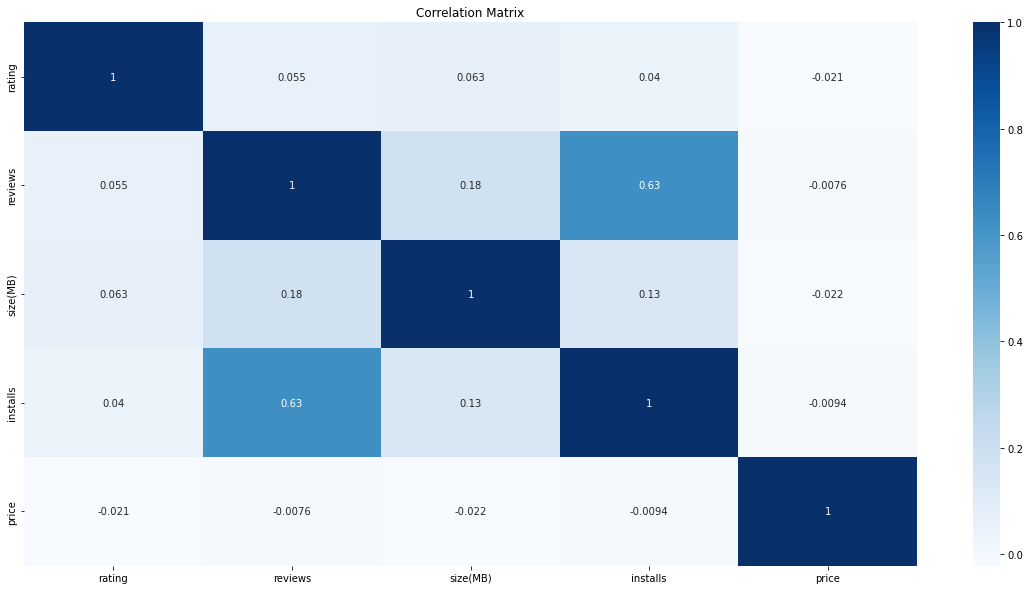

In [268]:
sns.heatmap(df1.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [269]:
df1

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


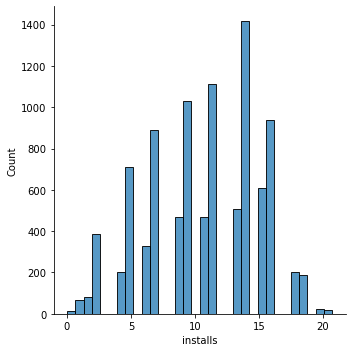

In [270]:
sns.displot(np.log(df1['installs']+1))

In [271]:
df1['last updated']=pd.to_datetime(df1['last updated'])

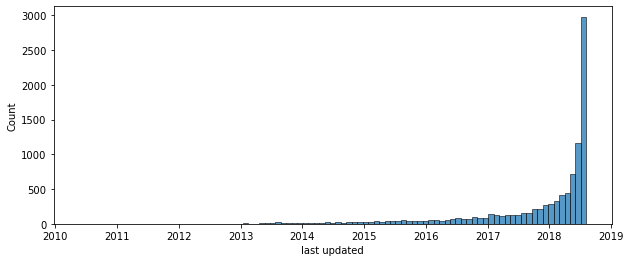

In [272]:
plt.figure(figsize=(10,4))
sns.histplot(x='last updated', data=df1)
plt.show()

In [273]:
df1

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [274]:
df1['last updated']=df1['last updated'].dt.year

In [275]:
df1

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,2017,1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018,1.0,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,2017,1.0,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015,Varies with device,Varies with device


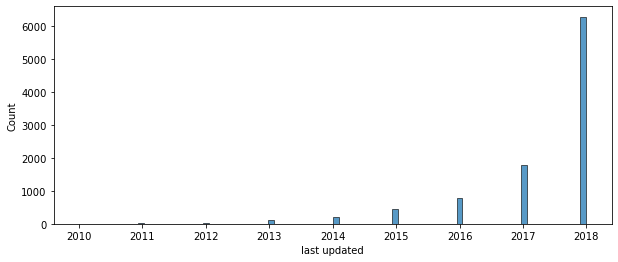

In [276]:
plt.figure(figsize=(10,4))
sns.histplot(x='last updated', data=df1)
plt.show()

In [277]:
df1['current ver']

0                    1.0.0
1                    2.0.0
2                    1.2.4
3       Varies with device
4                      1.1
               ...        
9654                  1.48
9655                   1.0
9656                   1.0
9657    Varies with device
9658    Varies with device
Name: current ver, Length: 9659, dtype: object

In [278]:
df1['current ver'] = df1['current ver'].replace('Varies with device', 'NaN', regex=True)

In [279]:
df1['current ver'].value_counts()

NaN          1055
1.0           799
1.1           260
1.2           176
2.0           149
             ... 
2.27.1          1
1.6.11          1
20180517        1
3.1.00          1
2.0.148.0       1
Name: current ver, Length: 2817, dtype: int64

In [280]:
df1['current vers']=df1['current ver'].str.extract(r'^(\d+).', ).astype(float)

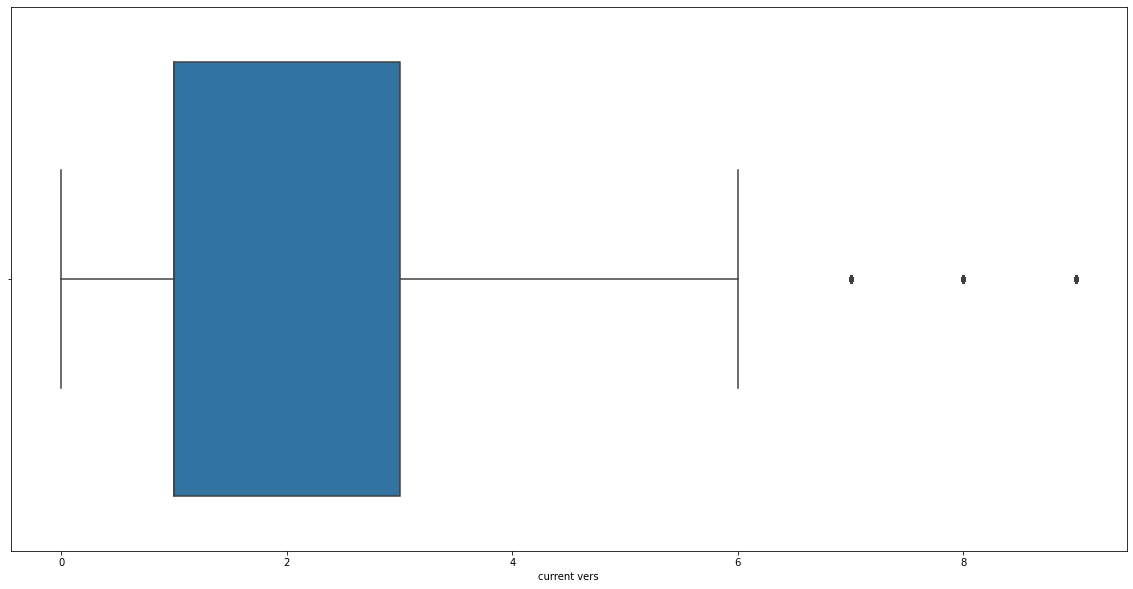

In [281]:
sns.boxplot(x='current vers', data=df1.loc[df1['current vers']<10])
plt.show()

In [282]:
df1['price'].value_counts()

0.00      8903
0.99       145
2.99       124
1.99        73
4.99        70
          ... 
18.99        1
389.99       1
19.90        1
1.75         1
1.04         1
Name: price, Length: 92, dtype: int64

In [283]:
df1['android ver']

0             4.0.3 and up
1             4.0.3 and up
2             4.0.3 and up
3               4.2 and up
4               4.4 and up
               ...        
9654            4.1 and up
9655            4.1 and up
9656            2.2 and up
9657    Varies with device
9658    Varies with device
Name: android ver, Length: 9659, dtype: object

In [284]:
df1['android ver']=df1['android ver'].replace('and up', '', regex=True)

In [285]:
df1

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver,current vers
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018,1.0.0,4.0.3,1.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018,2.0.0,4.0.3,2.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018,1.2.4,4.0.3,1.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018,NaN,4.2,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018,1.1,4.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,2017,1.48,4.1,1.0
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018,1.0,4.1,1.0
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,2017,1.0,2.2,1.0
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015,NaN,Varies with device,NaN


In [288]:
df1['android ver']=df1['android ver'].replace('Varies with device', '', regex=True).replace('W', '', regex=True).replace('', np.nan)
df1=df1.loc[df1['android ver'].str.contains(r'-') == False]

In [289]:
df1['android ver']=df1['android ver'].str.strip()

/var/folders/rw/l5vlj5_523xdwfb7kqxnvdrr0000gn/T/ipykernel_72156/2192669091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['android ver']=df1['android ver'].str.strip()


In [290]:
df1.drop('android ver',axis=1)

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,current vers
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018,1.0.0,1.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018,2.0.0,2.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018,1.2.4,1.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018,NaN,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018,1.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9652,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,2017,1.0.0,1.0
9653,FR Forms,BUSINESS,NaN,0,9.6,10.0,Free,0.0,Everyone,Business,2016,1.1.5,1.0
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,2017,1.48,1.0
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018,1.0,1.0


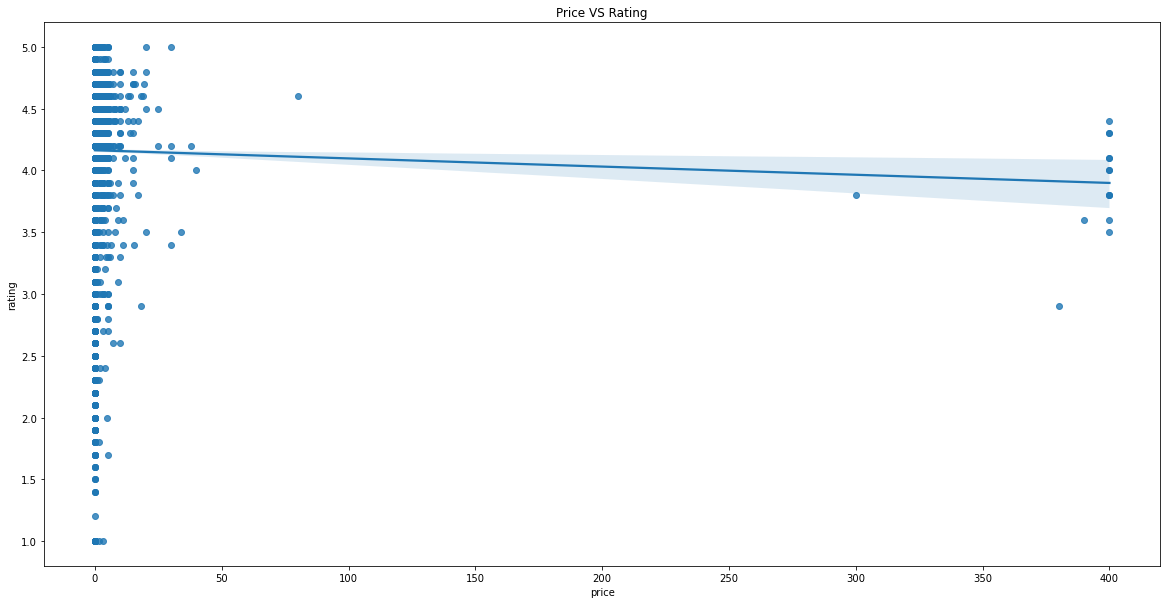

In [292]:
sns.regplot(x='price', y='rating', data=df1)
plt.title('Price VS Rating')
plt.show()

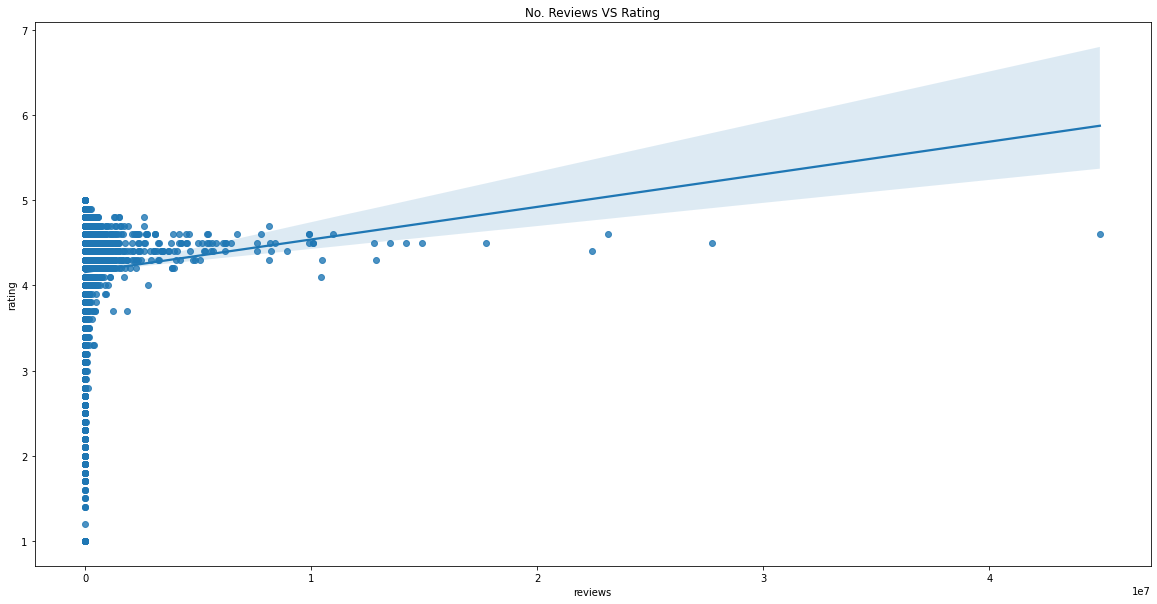

In [293]:
sns.regplot(y='rating', x='reviews', data=df1)
plt.title('No. Reviews VS Rating')
plt.show()

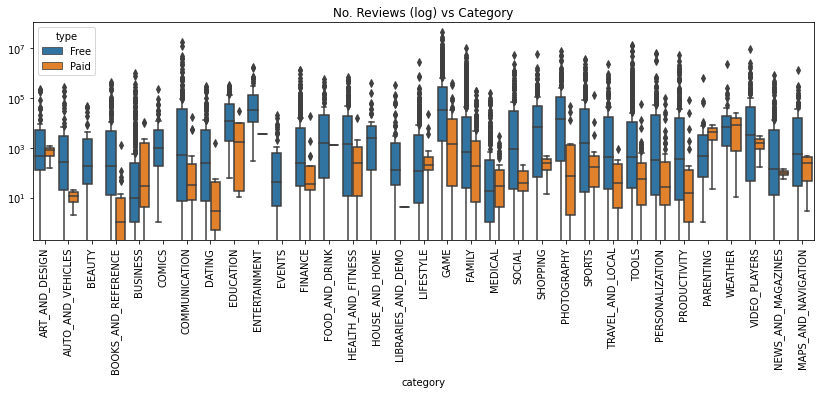

In [294]:
plt.figure(figsize=(14,4))
sns.boxplot(x='category', y='reviews', data=df1, hue='type')
plt.yscale('log')
plt.ylabel('')
plt.xticks(rotation=90);
plt.title('No. Reviews (log) vs Category')
plt.show()

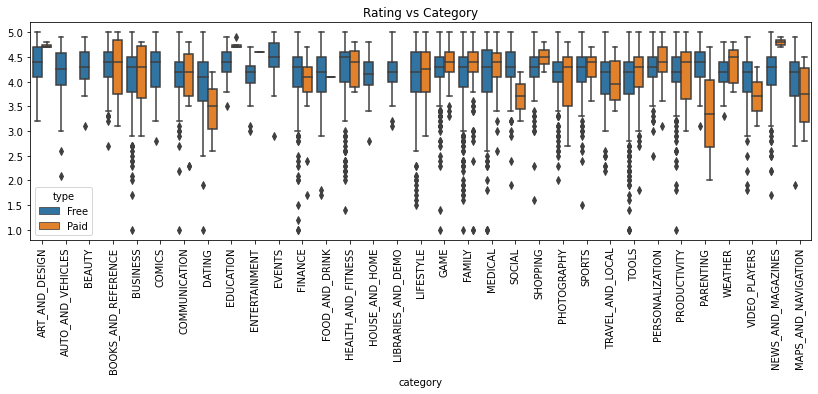

In [295]:
plt.figure(figsize=(14,4))
sns.boxplot(x='category', y='rating', data=df1, hue='type')
plt.xticks(rotation=90);
plt.title('Rating vs Category')
plt.ylabel('')
plt.show()

<AxesSubplot:xlabel='rating', ylabel='size(MB)'>

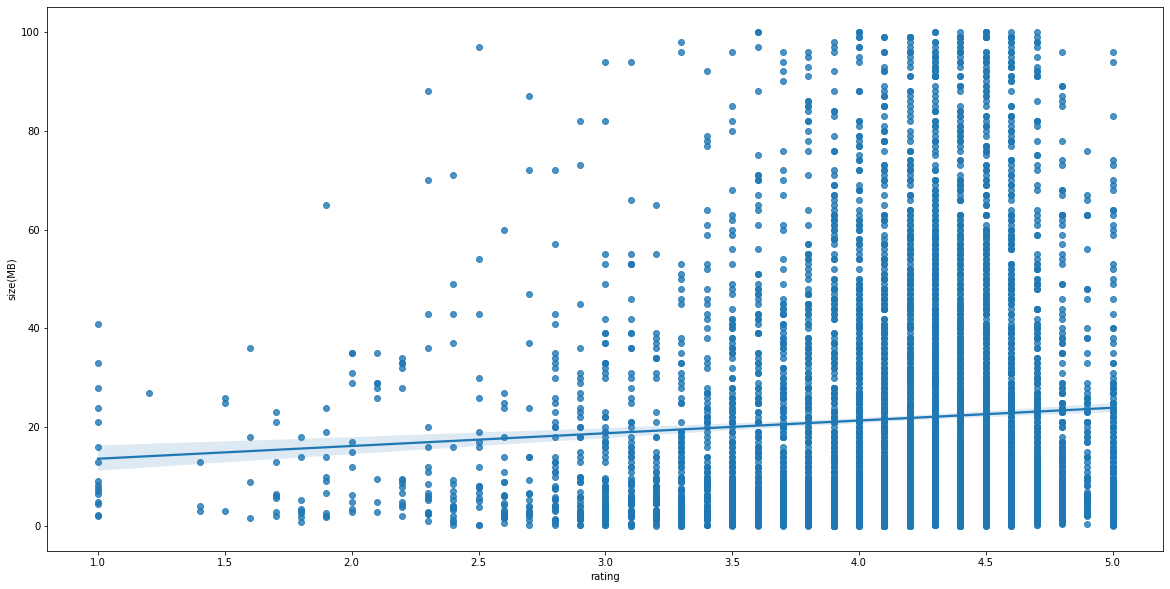

In [296]:
sns.regplot(x='rating', y='size(MB)', data=df1)

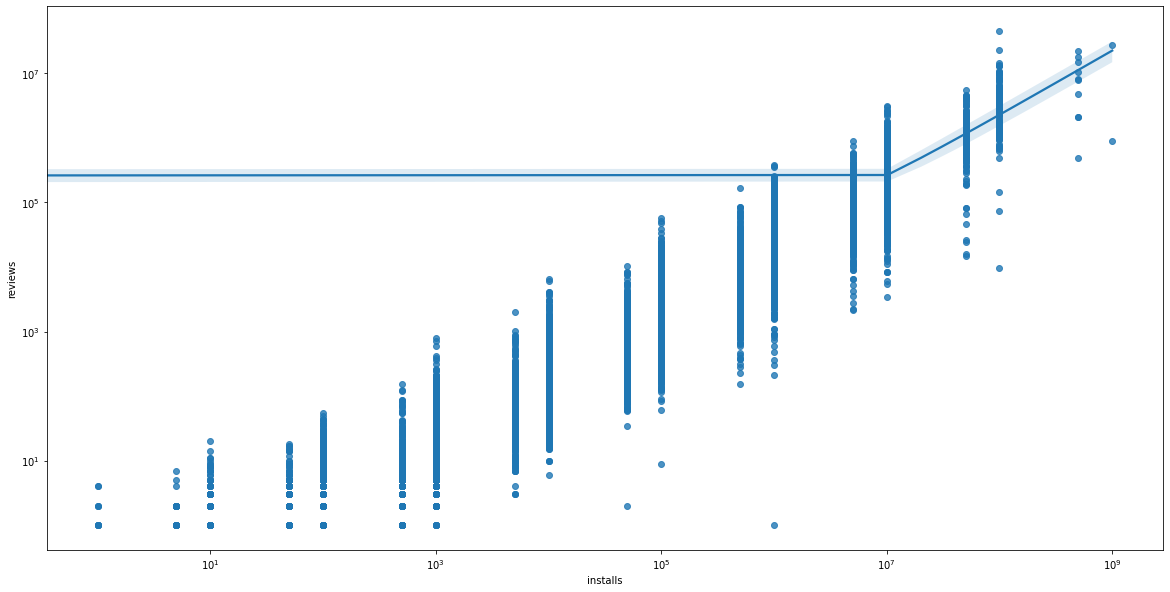

In [297]:
sns.regplot(x='installs',y='reviews', data=df1)
plt.yscale('log')
plt.xscale('log')

In [298]:
df2=df1.copy()

In [299]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8658 entries, 0 to 9656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             8658 non-null   object 
 1   category        8658 non-null   object 
 2   rating          7240 non-null   float64
 3   reviews         8658 non-null   int64  
 4   size(MB)        8375 non-null   float64
 5   installs        8658 non-null   float64
 6   type            8658 non-null   object 
 7   price           8658 non-null   float64
 8   content rating  8658 non-null   object 
 9   genres          8658 non-null   object 
 10  last updated    8658 non-null   int64  
 11  current ver     8650 non-null   object 
 12  android ver     8658 non-null   object 
 13  current vers    8324 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.2+ MB


In [300]:
df2=df2.drop(['app','last updated'], axis=1)

In [301]:
df2['installs']=np.log(df1['installs'] + 1)

In [302]:
df2['type'] = df2['type'].replace({'Free':0, "Paid":1})

In [303]:
df1['type'] = df1['type'].replace({0:'Free', 1:"Paid"})

/var/folders/rw/l5vlj5_523xdwfb7kqxnvdrr0000gn/T/ipykernel_72156/2403190743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['type'] = df1['type'].replace({0:'Free', 1:"Paid"})


In [304]:
df1

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver,current vers
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018,1.0.0,4.0.3,1.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018,2.0.0,4.0.3,2.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018,1.2.4,4.0.3,1.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018,NaN,4.2,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018,1.1,4.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9652,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,2017,1.0.0,4.1,1.0
9653,FR Forms,BUSINESS,NaN,0,9.6,10.0,Free,0.0,Everyone,Business,2016,1.1.5,4.0,1.0
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,2017,1.48,4.1,1.0
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018,1.0,4.1,1.0


In [305]:
df2

,category,rating,reviews,size(MB),installs,type,price,content rating,genres,current ver,android ver,current vers
0,ART_AND_DESIGN,4.1,159,19.0,9.210440,0,0.0,Everyone,Art & Design,1.0.0,4.0.3,1.0
1,ART_AND_DESIGN,3.9,967,14.0,13.122365,0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3,2.0
2,ART_AND_DESIGN,4.7,87510,8.7,15.424949,0,0.0,Everyone,Art & Design,1.2.4,4.0.3,1.0
3,ART_AND_DESIGN,4.5,215644,25.0,17.727534,0,0.0,Teen,Art & Design,NaN,4.2,NaN
4,ART_AND_DESIGN,4.3,967,2.8,11.512935,0,0.0,Everyone,Art & Design;Creativity,1.1,4.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9652,FAMILY,4.0,7,2.6,6.216606,0,0.0,Everyone,Education,1.0.0,4.1,1.0
9653,BUSINESS,NaN,0,9.6,2.397895,0,0.0,Everyone,Business,1.1.5,4.0,1.0
9654,FAMILY,4.5,38,53.0,8.517393,0,0.0,Everyone,Education,1.48,4.1,1.0
9655,FAMILY,5.0,4,3.6,4.615121,0,0.0,Everyone,Education,1.0,4.1,1.0


In [306]:
en = LabelEncoder()
cats =  ['category','content rating','genres']
for c in cats:
    df2[c] = en.fit_transform(df2[c])

In [307]:
df2

,category,rating,reviews,size(MB),installs,type,price,content rating,genres,current ver,android ver,current vers
0,0,4.1,159,19.0,9.210440,0,0.0,1,9,1.0.0,4.0.3,1.0
1,0,3.9,967,14.0,13.122365,0,0.0,1,12,2.0.0,4.0.3,2.0
2,0,4.7,87510,8.7,15.424949,0,0.0,1,9,1.2.4,4.0.3,1.0
3,0,4.5,215644,25.0,17.727534,0,0.0,4,9,NaN,4.2,NaN
4,0,4.3,967,2.8,11.512935,0,0.0,1,11,1.1,4.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9652,11,4.0,7,2.6,6.216606,0,0.0,1,38,1.0.0,4.1,1.0
9653,4,NaN,0,9.6,2.397895,0,0.0,1,22,1.1.5,4.0,1.0
9654,11,4.5,38,53.0,8.517393,0,0.0,1,38,1.48,4.1,1.0
9655,11,5.0,4,3.6,4.615121,0,0.0,1,38,1.0,4.1,1.0


In [309]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8658 entries, 0 to 9656
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        8658 non-null   int64  
 1   rating          7240 non-null   float64
 2   reviews         8658 non-null   int64  
 3   size(MB)        8375 non-null   float64
 4   installs        8658 non-null   float64
 5   type            8658 non-null   int64  
 6   price           8658 non-null   float64
 7   content rating  8658 non-null   int64  
 8   genres          8658 non-null   int64  
 9   current ver     8650 non-null   object 
 10  android ver     8658 non-null   object 
 11  current vers    8324 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 1.1+ MB


In [315]:
df2=df2.drop('current vers',axis=1)

In [314]:
df2=df2.drop('current ver',axis=1)

In [316]:
df2

,category,rating,reviews,size(MB),installs,type,price,content rating,genres,android ver
0,0,4.1,159,19.0,9.210440,0,0.0,1,9,4.0.3
1,0,3.9,967,14.0,13.122365,0,0.0,1,12,4.0.3
2,0,4.7,87510,8.7,15.424949,0,0.0,1,9,4.0.3
3,0,4.5,215644,25.0,17.727534,0,0.0,4,9,4.2
4,0,4.3,967,2.8,11.512935,0,0.0,1,11,4.4
...,...,...,...,...,...,...,...,...,...,...
9652,11,4.0,7,2.6,6.216606,0,0.0,1,38,4.1
9653,4,NaN,0,9.6,2.397895,0,0.0,1,22,4.0
9654,11,4.5,38,53.0,8.517393,0,0.0,1,38,4.1
9655,11,5.0,4,3.6,4.615121,0,0.0,1,38,4.1


In [320]:
df2['android ver']=df2['android ver'].str.extract(r'^(\d+).', ).astype(float)
df2['android ver'] = df2['android ver'].astype(float)

In [322]:
imputer = KNNImputer(n_neighbors=3)
df2 = pd.DataFrame(imputer.fit_transform(df2),columns = df2.columns)

In [323]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8658 entries, 0 to 8657
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        8658 non-null   float64
 1   rating          8658 non-null   float64
 2   reviews         8658 non-null   float64
 3   size(MB)        8658 non-null   float64
 4   installs        8658 non-null   float64
 5   type            8658 non-null   float64
 6   price           8658 non-null   float64
 7   content rating  8658 non-null   float64
 8   genres          8658 non-null   float64
 9   android ver     8658 non-null   float64
dtypes: float64(10)
memory usage: 676.5 KB


In [330]:
X=df2.drop('rating', axis = 1).values

In [331]:
y=df2['rating'].values

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [346]:
scaler = MinMaxScaler()

In [347]:
scaler.fit(X_train)

MinMaxScaler()

In [348]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

In [349]:
rf = RandomForestRegressor()

In [350]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [351]:
rf.score(X_test,y_test)

0.22772949141037535

In [352]:
xgb = XGBRegressor(n_estimators=2000, learning_rate=0.01)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=2000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [353]:
xgb.score(X_test,y_test)

0.2336920911198873

In [354]:
from sklearn.ensemble import GradientBoostingRegressor

In [355]:
def predict(ml_model):          
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    print('\n')
    y_prediction=model.predict(X_test)
    print('Testing score : {}'.format(model.score(X_test,y_prediction)))
    print('\n')

    print('predictions are: \n {}'.format(y_prediction[:10]))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

In [356]:
predict(GradientBoostingRegressor())

Training score : 0.19711560756239488


Testing score : 1.0


predictions are: 
 [4.16020268 4.15960367 4.27149673 3.98731903 4.32779906 4.08001176
 4.09506669 3.90251637 4.01853478 4.14999936]




NameError: name 'metrics' is not defined